## Step 2 : Convolution Neural network (CNN) MODEL TRAINING

* This consists of 2 convolutional layers (Two Convo2D 100@3x3).
* First, you have to load the dataset from data preprocessing.
* Then we have to configure the convolutional architecture
* I’ve included a model.add(Dropout(0.5)) to avoid the overfitting.
* Since we have two categories(with mask and without mask) we can use binary_crossentropy.
* You start training for 20 epoch with a model checkpoint.

In [1]:
import numpy as np

In [2]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

Using TensorFlow backend.


In [3]:
#loading the same numpy arrays 
Data=np.load('Data.npy')
Target=np.load('Target.npy')

In [4]:
#initialize CNN
model=Sequential()

### steps for CNN training
#### Step 1 : Convolution

In [5]:
model.add(Conv2D(200, (3,3), activation='relu', input_shape=Data.shape[1:]))

#### Step 2 : Maxpooling

In [6]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
#adding another convolution to improve the accuracy of the model

model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Step 3 : Flatten

In [8]:
model.add(Flatten())

#### Step 4: Full connection

In [9]:
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

#### Model Summary :

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 52900)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

### Compile the model :

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Spliting the data into train and test :

In [12]:
from sklearn.model_selection import train_test_split
train_Data,test_Data,train_Target,test_Target=train_test_split(Data,Target,test_size=0.1)

### Save the best model using modelcheckpoint

In [13]:
checkpoint = ModelCheckpoint('model2-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

### Train the neural network :

In [14]:
history=model.fit(train_Data,train_Target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 217s 219ms/step - loss: 0.6705 - accuracy: 0.5818 - val_loss: 0.5916 - val_accuracy: 0.6855
Epoch 2/20
990/990 [==============================] - 210s 212ms/step - loss: 0.4851 - accuracy: 0.7697 - val_loss: 0.3607 - val_accuracy: 0.8790
Epoch 3/20
990/990 [==============================] - 212s 214ms/step - loss: 0.2741 - accuracy: 0.8960 - val_loss: 0.2589 - val_accuracy: 0.8992
Epoch 4/20
990/990 [==============================] - 206s 209ms/step - loss: 0.2270 - accuracy: 0.9162 - val_loss: 0.3433 - val_accuracy: 0.8427
Epoch 5/20
990/990 [==============================] - 211s 213ms/step - loss: 0.1714 - accuracy: 0.9333 - val_loss: 0.1851 - val_accuracy: 0.9315
Epoch 6/20
990/990 [==============================] - 209s 211ms/step - loss: 0.1165 - accuracy: 0.9636 - val_loss: 0.1858 - val_accuracy: 0.9435
Epoch 7/20
990/990 [==============================] - 213s 215ms/step - loss: 

* In the above output, compare to all model ,i.e model_no. 007 is giving me a best accuracy, best loss and best validation accuracy

* So, Now we will build a face detection model using model_no.007 i.e, with mask or without mask in Step_no. 3

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

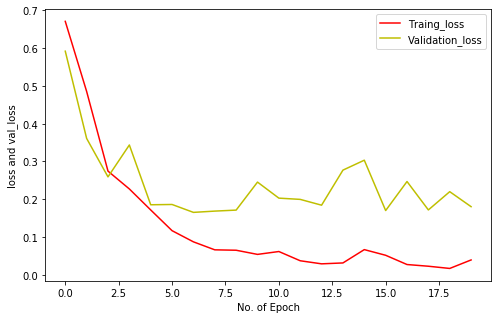

In [17]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'],'r',label='Traing_loss')
plt.plot(history.history['val_loss'],'y',label='Validation_loss')
plt.xlabel('No. of Epoch')
plt.ylabel("loss and val_loss")
plt.legend()
plt.show()

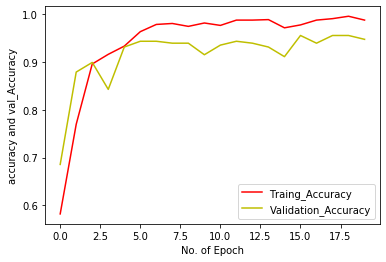

In [19]:
plt.plot(history.history['accuracy'],'r',label='Traing_Accuracy')
plt.plot(history.history['val_accuracy'],'y',label='Validation_Accuracy')
plt.xlabel('No. of Epoch')
plt.ylabel("accuracy and val_Accuracy")
plt.legend()
plt.show()

In [20]:
print("Model Accuracy : ",model.evaluate(test_Data,test_Target))

138/138 [==============================] - 12s 87ms/step
Model Accuracy :  [0.0897509749384894, 0.9637681245803833]
